`Automobiles of the 20th century -- PART I`

### Intoduction

The Automobile Dataset is a comprehensive collection of data related to various aspects of automobile specifications, performance metrics, and attributes.

*Links and Sources*

Aggregated data:
This dataset consist of data From 1985 Ward's Automotive Yearbook.

Sources:

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038
3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037​

Other links: https://www.kaggle.com/datasets/toramky/automobile-dataset

*How was the data collected*

The Automobile Dataset was collected from reputable sources and structured with a focus on vehicle specifications and performance metrics.

*Sample*

203 automobiles

*Data Processing*

Not processed

*Sampling*

The Automobile Dataset uses convenience sampling based on publicly available information from automotive publications, such as the 1985 Ward’s Automotive Yearbook. Vehicles included in the dataset represent a cross-section of popular cars from that time, produced by various manufacturers worldwide.

While the data covers a range of brands, engine types, and fuel systems, it is not a randomized or exhaustive sample of all cars from 1985. Instead, it focuses on vehicles for which comprehensive specifications were readily accessible. This makes the dataset suitable for exploratory analysis but not fully representative of the global automobile market at the time.

*Units*

The units are automobiles. The  size of the sample is 205. Each observation is rich in characteristics, there are 26 variables but we study only 4 of them (2 continuos and 2 categorical)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import plotly.express as px

In [2]:
df = pd.read_csv('Automobile_data.csv')
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.tail(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


*Variables*

In [4]:
df = pd.DataFrame(data=df, columns=['make', 'fuel-type', 'horsepower', 'city-mpg'])
df = df[df['horsepower'] != '?']
df

,make,fuel-type,horsepower,city-mpg
0,alfa-romero,gas,111,21
1,alfa-romero,gas,111,21
2,alfa-romero,gas,154,19
3,audi,gas,102,24
4,audi,gas,115,18
...,...,...,...,...
200,volvo,gas,114,23
201,volvo,gas,160,19
202,volvo,gas,134,18
203,volvo,diesel,106,26


Variable *make*


Description: The variable describes the make of each car

Type: categorical

Levels: 'alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'

In [5]:
make = df['make']
make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Variable *fuel-type*


Description: The variable describes fuel type of each car


Type: categorical


Levels: 'gas', 'diesel'

In [6]:
fuel_type = df['fuel-type']
fuel_type.unique()

array(['gas', 'diesel'], dtype=object)

Variable *horsepower*


Description: The variable describes horsepower of each car


Type: continuos


Range: [48, 288]

In [7]:
horsepower = df['horsepower'].astype(int)
min(horsepower), max(horsepower)

(48, 288)

Variable *city-mpg*


Description: The variable describes fuel efficiency in city driving conditions of each car in mpg


Type: continuos


Range: [13, 49]

In [8]:
city_mpg = df['city-mpg'].astype(int)
min(city_mpg), max(city_mpg)

(13, 49)

### Analysis

`ANOVA -- PART II`

### Forming an ANOVA df
As a categorical variable the $make$ is taken

As a continuous variable the $city-mpg$ is taken

Purpose: Make a df_anova with volkswagen, honda, toyota, nissan

Justification: These makes [are reported](https://carlifenation.com/the-cars-that-defined-the-20th-century/) to produce ones of the most fuel-efficient cars in the 20th century. Moreover, these brands are still worldwide famous. So it would be interesting to see if they could compete with each other in fuel efficiency

In [9]:
df_anova = df[(df["make"] == "volkswagen") | (df["make"] == "honda") | (df["make"] == "toyota") | (df["make"] == "nissan")][["make", "city-mpg"]]

df_anova

,make,city-mpg
30,honda,49
31,honda,31
32,honda,38
33,honda,30
34,honda,30
...,...,...
189,volkswagen,24
190,volkswagen,24
191,volkswagen,19
192,volkswagen,33


Conclusion: We formed a df of makes with the most reported fuel efficiency

### Boxplot

Purpose: Visualize the distribution in each class

Justification: Each column is a separate class, so we just use `sns.boxplot(DATAFRAME)` to plot it without any need to do any transformations. We want to make a guess on the equality of these distributions, equality of their means, see the outliers

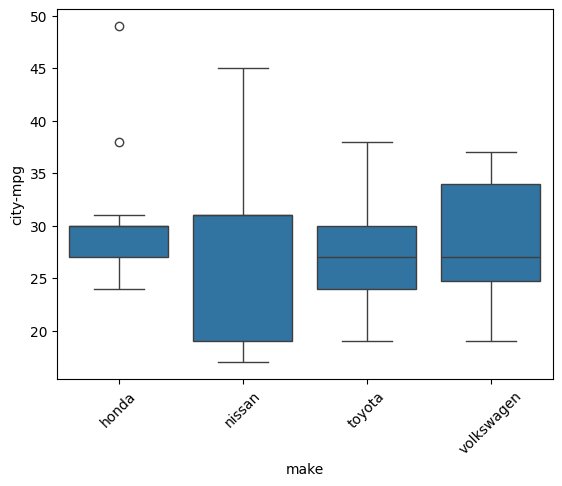

In [10]:
sns.boxplot(df_anova, x = "make", y = "city-mpg")
plt.xticks(rotation = 45)
plt.show()


Also the same representation with another library `plotly`
``` python
import plotly.express as px
```

In [11]:
px.box(df_anova, x = "make", y = "city-mpg")

In [12]:
len(df_anova[df_anova["make"] == "nissan"]), len(df_anova[df_anova["make"] == "honda"])

(18, 13)

Conclusion: From what we have seen so far it is not clear if the means could be equal. Nevertheless, we need to test this hypothesis

### Model
We assume that, for all $i \in \{1, \dots, k\}$, whenever $X = x_i$, we observe $n_i$ values of $Y$ denoted $Y_{ij}$, for $j \in \{1, \dots, n_i\}$

**In my analysis:** $k = 4$, $n_i \in \{12, 13, 18, 32\}$, $X$ is the $make$, $Y$ is the $city-mpg$
### Assumptions
There exist constants $\mu_1, \dots, \mu_k$ and a constant $\sigma > 0$ such that the outputs $$(Y_{11}, \dots, Y_{1n_1}), (Y_{21}, \dots, Y_{2n_2}), \dots, (Y_{k1}, \dots, Y_{kn_k})$$ write $$Y_{ij} = \mu_i + \epsilon_{ij}, \quad \text{for } i \in \{1, \dots, k\}, \quad j \in \{1, \dots, n_i\}$$

### The significance test
The interest of the model lies in the fact that it can detect variations in $Y$ with respect to $i$. Therefore the significance test is $$ H_0: [\mu_1 = \dots = \mu_k] \quad H_1: \overline{H_0} $$

If we reject $H_0$, it means that at least two different levels of the input produce significantly different outputs

### SST, SSE, SSM under the assumption $H_0$

$$ Y_{ij} \sim \mathcal{N}(\mu, \sigma^2) \quad \text{with} \quad \mu = \mu_1 = \dots = \mu_k $$

Purpose: Calculate variables for the ANOVA table and the F-test

Justification: We will use the calculated values either for calculating something else from it later or for the usage in the next part of our work

`k` is the number of groups, `N` is the total sample size, `ttl_m` is the total mean of all observations, `SST` is the total sum of squares, `SSM` is the inter-class variance, `SSE` is the intra-class variance, `dfM` is the degrees of freedom between groups, `dfE` is the degrees of freedom within groups, `dfT` is the total degrees of freedom, `MSM` is the mean square between groups, `MSE` is the mean square within groups

In [13]:
makes_uni = df_anova["make"].unique()

k = len(makes_uni)
N = len(df_anova)
ttl_mn = np.mean(df_anova["city-mpg"])
SST = sum(sum((df_anova[df_anova["make"] == gp]["city-mpg"] - ttl_mn) ** 2)
    for gp in makes_uni
)
SSM = sum(len(df_anova[df_anova["make"] == gp]) * 
    (np.mean(df_anova[df_anova["make"] == gp]["city-mpg"]) - ttl_mn) ** 2 
    for gp in makes_uni
)
SSE = SST - SSM
dfM = k - 1
dfE = N - k
dfT = N - 1
MSM = SSM / dfM
MSE = SSE / dfE

Conclusion: We calculated the values for usage in the table and for calculation of f-val and p-val

### F-test

Purpose: Conclude  the significance of variation of $Y$ with respect to $X$

Justification: Calculate $f$ the realization of $F$ and fix a significance level 1 - $\alpha$, then decide on the $p-value$ using st.f.cdf($f$, $dfM$, $dfE$). We will make a decision on $\alpha = 0.05$

In [14]:
f_value = MSM / MSE
p_value = 1 - st.f.cdf(f_value, dfM, dfE)

f'The f-value is {f_value}, the p-value is {p_value}'

'The f-value is 0.9477014771819524, the p-value is 0.4223310915536309'

Conclusion: At the significance level 95% we fail to reject the hypothesis $ H_0 $. There are no significant differences in the means of the groups

### ANOVA table

`Note:` $MS$ stands for mean squares, $MSM$ = mean squares  of the model and $MSE$ = mean squares of the error

In [15]:
table_dict = {
    'Source': ['Model', 'Error', 'Total'],
    'df': [dfM, dfE, dfT],  
    'SS': [SSM, SSE, SST],  
    'MS': [MSM, MSE, None],  
    'F': [f_value, None, None],   
    'p-value': [p_value, None, None]  
}

ANOVA_TABLE = pd.DataFrame(table_dict)
ANOVA_TABLE 

,Source,df,SS,MS,F,p-value
0,Model,3,103.793077,34.597692,0.947701,0.422331
1,Error,71,2591.993590,36.506952,NaN,NaN
2,Total,74,2695.786667,NaN,NaN,NaN
